In [63]:
import importlib
import analysis
from IPython.display import HTML, display
import pandas as pd

importlib.reload(analysis)

pd.options.mode.copy_on_write = True

df = analysis.read_experiments([
  # "../campaign/precision5820/com.google.ortools.sat-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat.noglobal-v9.9.csv",
  # "../campaign/precision5820/com.google.ortools.sat-v9.9-par.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par-java11.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15.csv",
  # "../campaign/precision5820/org.choco.choco-v4.10.15-par.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.1.7-A5000.csv",
  # "../campaign/precision5820/turbo.cpu.release-v1.2.0.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.0.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.1.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.2.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.5.csv"
  # "../campaign/helios/turbo.gpu.release-v1.2.2.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.5.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.5-mzn2022-short.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.6-mzn2022-short.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.7-mzn2022-short.csv",
  # "../campaign/precision5820/turbo.gpu.release-v1.2.8-mzn2022-short.csv"
  # "../campaign/helios/turbo.gpu.release-v1.2.3.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.5.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.6.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.7-mzn2024.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv",
  "../campaign/iris-hopper/turbo.gpu.release-v1.2.9-mzn2024.csv",
  "../campaign/iris-hopper/turbo.gpu.release-v1.2.9-mzn2024-eps.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.9-mzn2024.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.9-mzn2024-eps-rand.csv",
  "../campaign/aion/org.choco.choco-v4.10.18-mzn2024.csv",
  "../campaign/aion/com.google.ortools.sat-v9.9.csv"
  # "../campaign/iris/turbo.gpu.release-v1.2.4.csv",
  # "../campaign/precision7750/turbo.cpu.release-v1.2.6-analysis.csv"
  # "../campaign/aion/turbo.cpu.release-v1.2.7-mzn2024-analysis.csv"
  # "../campaign/precision7750/turbo.gpu.release-v1.2.7.csv"
  # "../campaign/precision5820/turbo.cpu.release-v1.2.4.csv"
])

# df.to_csv("test.csv", index=False)

mzn_challenge = pd.read_csv("../benchmarking/mzn2024.csv")
# mzn_challenge = pd.read_csv("../benchmarking/short.csv")
mzn_challenge['model_data_file'] = mzn_challenge['model'] + ' - ' + mzn_challenge['data_file']
# print(mzn_challenge)
mzn_data = set(mzn_challenge['model_data_file'])
df = df[df['model_data_file'].isin(mzn_data)]

# df = df[df['memory_configuration'] != 'global']

df = analysis.intersect(df)

# analysis.plot_overall_result(df)
# display(HTML(analysis.metrics_table(df[df['mzn_solver'].str.startswith("turbo")]).to_html()))
metrics = analysis.metrics_table(df)
display(HTML(metrics.to_html()))
# print(metrics[metrics['short_uid'] != "turbo.gpu_1.2.7_hybrid_wac1_4096_32768_264_72"][['short_uid', 'avg_nodes_per_second','median_nodes_per_second','avg_fp_iterations_per_second','median_fp_iterations_per_second', 'avg_propagator_mem_mb', 'median_propagator_mem_mb', 'avg_store_mem_kb', 'median_store_mem_kb', 'problem_with_store_shared', 'problem_with_props_shared']].T.to_latex(index=True))

sorted_metrics = metrics.sort_values(by=['problem_optimal', 'problem_sat', 'avg_nodes_per_second', 'version'], ascending=[False, False, False, True])
print(sorted_metrics[['short_uid','avg_nodes_per_second','problem_optimal', 'problem_sat', 'problem_unknown']].to_markdown(index=False))
# print(sorted_metrics[['short_uid','problem_optimal', 'problem_sat', 'problem_unknown']].to_latex(index=False))

target_solver_uid="turbo.gpu.release_1.2.9_iris-hopper_1200s_barebones_wac1_0"


../campaign/iris-hopper/turbo.gpu.release-v1.2.9-mzn2024.csv : Number of erroneous rows:  7
../campaign/iris-hopper/turbo.gpu.release-v1.2.9-mzn2024.csv 5     ../data/mzn-challenge/2024/portal/random_20_9_...
19    ../data/mzn-challenge/2024/aircraft-disassembl...
20    ../data/mzn-challenge/2024/portal/random_20_1_...
58    ../data/mzn-challenge/2024/yumi-dynamic/p_5_GS...
75    ../data/mzn-challenge/2024/yumi-dynamic/p_7_SS...
88    ../data/mzn-challenge/2024/yumi-dynamic/p_5_GG...
95    ../data/mzn-challenge/2024/yumi-dynamic/p_4_GG...
Name: data_file, dtype: object
../campaign/iris-hopper/turbo.gpu.release-v1.2.9-mzn2024.csv: 4 failed experiments using turbo.gpu.release have been removed (the faulty experiments have been stored in failed_turbo.gpu.release-v1.2.9-mzn2024.csv).
../campaign/iris-hopper/turbo.gpu.release-v1.2.9-mzn2024-eps.csv : Number of erroneous rows:  21
../campaign/iris-hopper/turbo.gpu.release-v1.2.9-mzn2024-eps.csv 22     ../data/mzn-challenge/2024/yumi-dynamic/

,uid,version,machine,short_uid,avg_nodes_per_second,median_nodes_per_second,avg_normalized_nodes_per_second,best_nodes_per_second,avg_deductions_per_node,median_deductions_per_node,avg_normalized_deductions_per_node,median_normalized_deductions_per_node,best_deductions_per_node,avg_deductions_per_second,median_deductions_per_second,avg_normalized_deductions_per_second,median_normalized_deductions_per_second,best_deductions_per_second,avg_fp_iterations_per_second,median_fp_iterations_per_second,avg_normalized_fp_iterations_per_second,best_fp_iterations_per_second,avg_fp_iterations,median_fp_iterations,avg_normalized_fp_iterations,best_fp_iterations,avg_propagator_mem_mb,median_propagator_mem_mb,avg_normalized_propagator_mem_mb,best_propagator_mem_mb,avg_store_mem_kb,avg_normalized_store_mem_kb,best_store_mem_kb,median_store_mem_kb,problem_optimal,problem_sat,problem_unknown,problem_with_store_shared,problem_with_props_shared,idle_eps_workers
7,turbo.gpu.release_1.2.9_iris-hopper_1200s_barebones_wac1_0_first_fail_split,1.2.9,iris-hopper,turbo.gpu_1.2.9_barebones_wac1_0_first_fail_split,1.137816e+06,148311.387193,0.0,0,241001.402913,245255.048278,0.0,0.0,10,3.869286e+10,3.588820e+10,0.0,0.0,10,5.947193e+06,1.858671e+06,0.0,0,9.360417,9.816946,0.0,10,0.31513,0.261432,0.0,10,142.8512,0.0,10,111.752,2,8,0,1,2,5.0
10,turbo.gpu.release_1.2.9_iris-hopper_1200s_barebones_wac1_0_random42_split,1.2.9,iris-hopper,turbo.gpu_1.2.9_barebones_wac1_0_random42_split,1.109661e+06,355938.308066,0.0,0,214590.440148,170786.728785,0.0,0.0,10,5.384748e+10,5.866483e+10,0.0,0.0,10,6.192624e+06,3.009454e+06,0.0,0,8.165986,8.755623,0.0,10,0.31513,0.261432,0.0,10,142.8512,0.0,10,111.752,2,6,2,1,2,0.0
5,turbo.gpu.release_1.2.9_iris-hopper_1200s_barebones_wac1_0,1.2.9,iris-hopper,turbo.gpu_1.2.9_barebones_wac1_0,1.016929e+06,39661.592784,0.0,0,233087.467600,249148.224669,0.0,0.0,10,2.593981e+10,1.339623e+10,0.0,0.0,10,4.992822e+06,3.639738e+05,0.0,0,9.282916,9.518987,0.0,10,0.31513,0.261432,0.0,10,142.8512,0.0,10,111.752,2,8,0,1,2,5.0
6,turbo.gpu.release_1.2.9_iris-hopper_1200s_barebones_wac1_0_anti_first_fail_split,1.2.9,iris-hopper,turbo.gpu_1.2.9_barebones_wac1_0_anti_first_fail_split,9.328625e+05,319857.753888,0.0,0,173571.355108,193596.671262,0.0,0.0,10,5.195029e+10,6.084984e+10,0.0,0.0,10,4.538521e+06,3.039981e+06,0.0,0,7.561288,7.379245,0.0,10,0.31513,0.261432,0.0,10,142.8512,0.0,10,111.752,1,4,5,1,2,1.0
8,turbo.gpu.release_1.2.9_iris-hopper_1200s_barebones_wac1_0_random0_split,1.2.9,iris-hopper,turbo.gpu_1.2.9_barebones_wac1_0_random0_split,9.003624e+05,351845.771099,0.0,0,221731.371640,177065.970063,0.0,0.0,10,5.262359e+10,5.812013e+10,0.0,0.0,10,5.374338e+06,2.985740e+06,0.0,0,8.552135,9.125861,0.0,10,0.31513,0.261432,0.0,10,142.8512,0.0,10,111.752,2,7,1,1,2,1.0
9,turbo.gpu.release_1.2.9_iris-hopper_1200s_barebones_wac1_0_random10000_split,1.2.9,iris-hopper,turbo.gpu_1.2.9_barebones_wac1_0_random10000_split,7.724533e+05,343003.190131,0.0,0,217153.889693,180831.747965,0.0,0.0,10,5.130520e+10,5.922551e+10,0.0,0.0,10,4.772679e+06,2.878471e+06,0.0,0,8.418080,8.717231,0.0,10,0.31513,0.261432,0.0,10,142.8512,0.0,10,111.752,1,7,2,1,2,1.0
2,org.choco.choco_4.10.18_aion_1200s,4.10.18,aion,choco_4.10.18,1.110394e+05,93542.205727,0.0,0,1.000000,1.000000,0.0,0.0,10,1.110394e+05,9.354221e+04,0.0,0.0,10,0.000000e+00,0.000000e+00,0.0,0,0.000000,0.000000,0.0,10,0.00000,0.000000,0.0,10,0.0000,0.0,10,0.000,2,8,0,0,0,0.0
0,com.google.ortools.sat_9.9_aion_1200s,9.9,aion,ortools_9.9,3.957403e+04,13206.966115,0.0,0,1.000000,1.000000,0.0,0.0,10,3.957403e+04,1.320697e+04,0.0,0.0,10,0.000000e+00,0.000000e+00,0.0,0,0.000000,0.000000,0.0,10,0.00000,0.000000,0.0,10,0.0000,0.0,10,0.000,3,7,0,0,0,0.0
3,org.choco.choco_4.10.18_aion_1200s_64threads_64cores,4.10.18,aion,choco_4.10.18_64threads_64cores,1.491102e+04,3031.913188,0.0,0,1.000000,1.000000,0.0,0.0,10,1.491102e+04,3.031913e+03,0.0,0.0,10,0.000000e+00,0.000000e+00,0.0,0,0.000000,0.000000,0.0,10,0.00000,0.000000,0.0,10,0.00

| short_uid                                              |   avg_nodes_per_second |   problem_optimal |   problem_sat |   problem_unknown |
|:-------------------------------------------------------|-----------------------:|------------------:|--------------:|------------------:|
| ortools_9.9_64threads_64cores                          |           27.8597      |                 7 |             3 |                 0 |
| ortools_9.9                                            |        39574           |                 3 |             7 |                 0 |
| choco_4.10.18_64threads_64cores                        |        14911           |                 3 |             7 |                 0 |
| turbo.gpu_1.2.9_barebones_wac1_0_first_fail_split      |            1.13782e+06 |                 2 |             8 |                 0 |
| turbo.gpu_1.2.9_barebones_wac1_0                       |            1.01693e+06 |                 2 |             8 |                 0 |
| choco_4.10.18     

#### MiniZinc and XCSP3 Scoreboards

In [64]:
solvers_in_scoreboard = [
  # "com.google.ortools.sat_9.9_aion_1200s_64threads_64cores",
  # "org.choco.choco_4.10.18_aion_1200s_64threads_64cores",
  # "org.choco.choco_4.10.18_aion_1200s_free",
  # "com.google.ortools.sat_9.9_aion_1200s",
  # "org.choco.choco_4.10.18_aion_1200s",
  target_solver_uid,
  target_solver_uid + "_first_fail_split",
  target_solver_uid + "_random_split",
  target_solver_uid + "_anti_first_fail_split"
]

print(analysis.scores_summary('MiniZinc', analysis.minizinc_challenge_score(df, solvers_in_scoreboard)).to_markdown(index=False))
# print(analysis.scores_summary('MiniZinc', analysis.minizinc_challenge_score(df, solvers_in_scoreboard)).to_latex(index=False))
print(analysis.scores_summary('XCSP3', analysis.xcsp3_challenge_score(df, solvers_in_scoreboard)).to_markdown(index=False))


| solver                                                                           |   MiniZinc score |
|:---------------------------------------------------------------------------------|-----------------:|
| turbo.gpu.release_1.2.9_iris-hopper_1200s_barebones_wac1_0_first_fail_split      |         14.8966  |
| turbo.gpu.release_1.2.9_iris-hopper_1200s_barebones_wac1_0                       |          8.10335 |
| turbo.gpu.release_1.2.9_iris-hopper_1200s_barebones_wac1_0_anti_first_fail_split |          3       |
| turbo.gpu.release_1.2.9_iris-hopper_1200s_barebones_wac1_0_random_split          |          0       |
| solver                                                                           |   XCSP3 score |
|:---------------------------------------------------------------------------------|--------------:|
| turbo.gpu.release_1.2.9_iris-hopper_1200s_barebones_wac1_0_first_fail_split      |             8 |
| turbo.gpu.release_1.2.9_iris-hopper_1200s_barebones_wac1_0             

#### Analysis of memory footprint and time distribution per instance

In [65]:

# print(df[((df['store_mem'] + df['propagator_mem']) / 1000 / 1000) > 5][['model_data_file', 'uid', 'store_mem', 'propagator_mem', 'status']].to_markdown(index=False))
# analysis.plot_mem_distribution(df[df['uid'] == target_solver_uid])
# analysis.plot_time_distribution("barebones-wac1", df[df['uid'] == target_solver_uid])


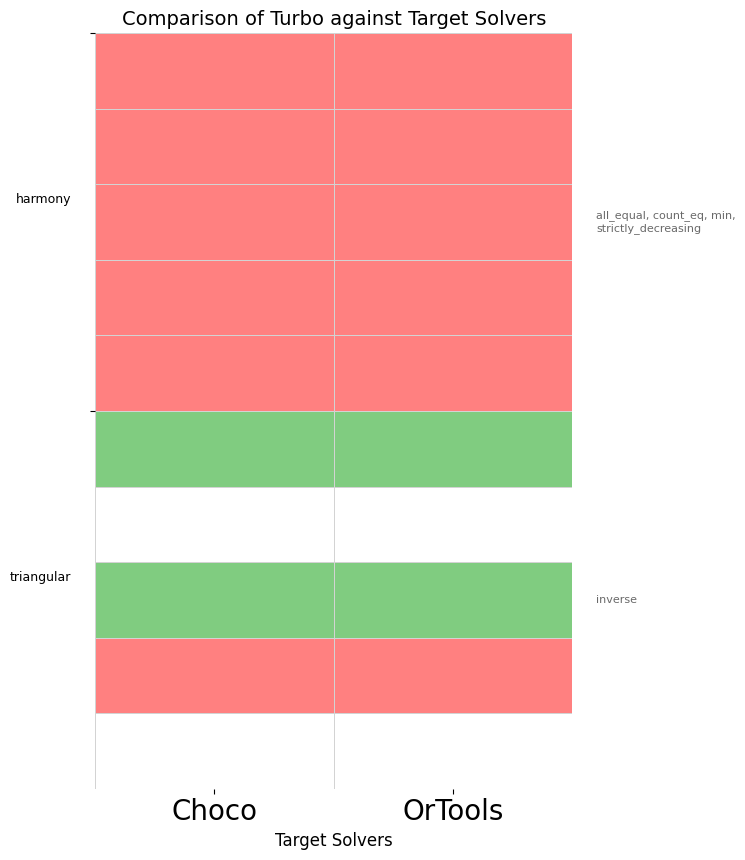

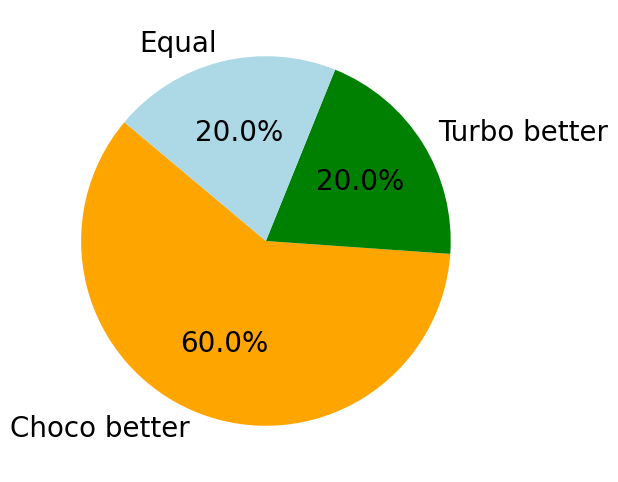

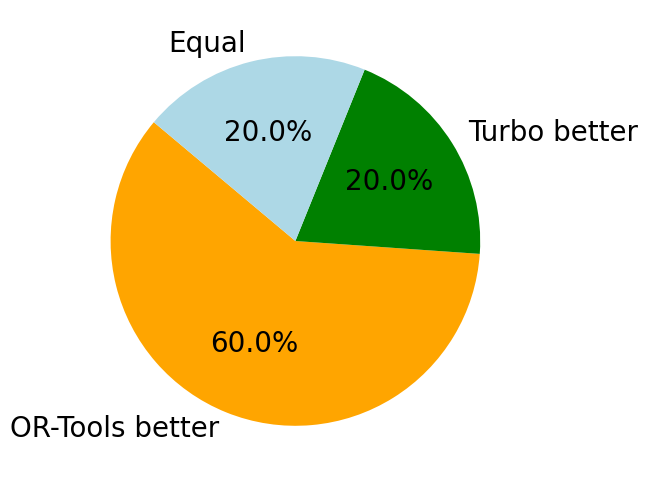

In [66]:

# analysis.comparison_table_md(df, "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0_no_pr", "turbo.gpu.release_1.2.8_helios_1200s_barebones_wac1_0_32768_0")

global_cons = pd.read_csv("global-mzn2024.csv")
analysis.heatmap_solver_comparison(df,
  (target_solver_uid, "Turbo"),
  [("org.choco.choco_4.10.18_aion_1200s", "Choco"),
  #  ("org.choco.choco_4.10.18_aion_1200s_64threads_64cores", "Choco (64 threads)"),
  #  ("org.choco.choco_4.10.18_aion_1200s_free", "Choco (free)"),
   ("com.google.ortools.sat_9.9_aion_1200s", "OrTools")],
  global_cons)

p = analysis.compare_solvers_pie_chart(df, target_solver_uid, "org.choco.choco_4.10.18_aion_1200s", "Turbo", "Choco")
# print(p[p['Comparison'] == 'Error'])
# p = analysis.compare_solvers_pie_chart(df, target_solver_uid, "org.choco.choco_4.10.18_aion_1200s_free", "TCN", "Choco (free)")
# p = analysis.compare_solvers_pie_chart(df, target_solver_uid, "org.choco.choco_4.10.18_aion_1200s_64threads_64cores", "TCN", "Choco (64 threads)")
p = analysis.compare_solvers_pie_chart(df, target_solver_uid, "com.google.ortools.sat_9.9_aion_1200s", "Turbo", "OR-Tools")
# p = analysis.compare_solvers_pie_chart(df, target_solver_uid, "com.google.ortools.sat_9.9_aion_1200s_64threads_64cores", "TCN", "OR-Tools (64 threads)")
# print(p[p['Comparison'] == 'Error'])
# print(p[p['Comparison'] == 'turbo.gpu.release_1.2.5_precision5820_300s_hybrid_ac1_4096_128_10 better'])

